In [1]:
#Load packages
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import cartopy.crs as ccrs
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as mpatches
from collections import OrderedDict

In [26]:
DeepMIP_dict = OrderedDict({
    "Climber3a":{"model":"Climber3a",
               "temp":"ts",
               "time":"Time",
               "lon":"xt_i",
               "lat":"yt_j",
               "month":" ",
               "albedo":"ap",
               "watervap":"qi",
               "clouds":"cld",
               "seaice":"fice",
               "radbalance":"rbtp",
               "radbalancesur":"rbsr",
               "solarin":"fs2", #toa
               "out_lw":"fl3",
               "abs_sw":"swa",
               "abs_lw":"rwa",
               "color":"red"},
    
    "Climber3a_his":{"model":"Climber3a_his",
                     "temp":"ts_ann",
                    "time":"Time",
                    "lon":"xt_i",
                    "lat":"yt_j",
                    "albedo":"ap_ann",
                    "radbalance":"rbtp_ann",
                    "radbalancesur":"rbsr_ann",
                    "clouds":"cld_ann",
                    "out_lw":"fl3_ann"},
   
    "ClimberX" :{"model":"ClimberX",  
               "temp":"t2a",
               "time":"time",
               "month":"mon",   #only atm.nc
               "day":"doy",
               "lat":"lat",
               "lon":"lon",
               "albedo":"alb_plan",
               "watervap":"wcon",
               "clouds":"cld",
               "seaice":"fsic",
               "out_lw":"lwr_top", #at toa
               "radbalance":"rb_top",
               "radbalancesur":"rb_sur",
               "solarin":"solar",#toa
               "abs_sw":"swr_atm",
               "abs_lw":"lwr_atm",
               "color":"blue"},
    
    "ClimberX_sic" :{"model":"ClimberX_sic",  
               "temp":"t2a",
               "time":"time",
               "month":"mon", #only sic.nc
               "lat":"lat",
               "lon":"lon",
               "albedo":"alb_plan",
               "watervap":"wcon",
               "clouds":"cld",
               "seaice":"fsic",
               "olr":"lwr_top",
               "color":"blue"},
    
    "CESM"     :{"model":"CESM",
               "temp":"tas",
               "time":"",
               "lat":"lat",
               "lon":"lon",
               "month":"month",
               "color":"cyan"},
    
    "COSMOS"   :{"model":"COSMOS",
               "temp":"tas",
               "lat":"lat",
               "lon":"lon",
               "time":"time",
               "month":" ",
               "color":"purple"},
    
    "HadCM3"   :{"model":"HadCM3",
               "temp":"tas",
               "lat":"latitude",
               "lon":"longitude",
               "time":"t",
               "month":" ",
               "color":"lightgreen"},
    
    "IPSL"     :{"model":"IPSL",
               "temp":"tas",
               "lat":"lat",
               "lon":"lon",
               "time":"time_counter",
               "month":" ",
               "color":"black"},
    
    "GFDL"     :{"model":"GFDL",
               "temp":"tas",
               "lat":"lat",
               "lon":"lon",
               "time":"time",
               "month":" ",
               "color":"orange"},
    
    "NorESM1_F":{"model":"NorESM1_F",
               "temp":"tas",
               "month":"",
               "time":"time",
               "lat":"lat",
               "lon":"lon",
               "color":"lightblue"},
    
    "MIROC"    :{"model":"MIROC",
                "temp":"tas",
                "lat":"lat",
                "lon":"lon",
                "time":"time",
                "mon":" ",
                "color":"yellow"},
    
    "INMCM"    :{"model":"INMCM",
                 "temp":"tas",
                 "lat":"lat",
                 "lon":"lon",
                 "time":"time",
                 "month":" ",
                 "color":"pink"}})
    
    
#fl3 out lwr

In [3]:
#Climber

#Climber3a files
Climber3a_0280=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0280ppm/snapshots_potsdam2-yearmean-200y.nc')
Climber3a_0840=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0840ppm/snapshots_potsdam2-yearmean-200y.nc')
Climber3a_0560=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0560ppm/snapshots_potsdam2-yearmean-200y.nc')
Climber3a_1120=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_1120ppm/snapshots_potsdam2-yearmean-200y.nc')
Climber3a_1680=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_1680ppm/snapshots_potsdam2-yearmean-200y.nc')                      
Climber3a_3360=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_3360ppm/snapshots_potsdam2-yearmean-200y.nc')


#ClimberX files
#included restart files

Path='/p/projects/ace/petri/climber-x-eocene/55Ma_'

#atm.nc
ClimberX_0280=xr.open_mfdataset([Path+'0280ppm_eq/0002000.atm.nc',Path+'0280ppm_eq/0003000.atm.nc',Path+'0280ppm_eq/0004000.atm.nc'])
ClimberX_0560=xr.open_mfdataset([Path+'0560ppm_eq/0002000.atm.nc',Path+'0560ppm_eq/0003000.atm.nc',Path+'0560ppm_eq/0004000.atm.nc'])
ClimberX_0840=xr.open_mfdataset([Path+'0840ppm_eq/0002000.atm.nc',Path+'0840ppm_eq/0003000.atm.nc',Path+'0840ppm_eq/0004000.atm.nc'])
ClimberX_1120=xr.open_mfdataset([Path+'1120ppm_eq/0002000.atm.nc',Path+'1120ppm_eq/0003000.atm.nc',Path+'1120ppm_eq/0004000.atm.nc'])
ClimberX_1680=xr.open_mfdataset([Path+'1680ppm_eq/0002000.atm.nc',Path+'1680ppm_eq/0003000.atm.nc',Path+'1680ppm_eq/0004000.atm.nc'])
ClimberX_3360=xr.open_mfdataset([Path+'3360ppm_eq/0002000.atm.nc',Path+'3360ppm_eq/0003000.atm.nc',Path+'3360ppm_eq/0004000.atm.nc'])

#sic.nc
ClimberX_sic_0280=xr.open_mfdataset([Path+'0280ppm_eq/0002000.sic.nc',Path+'0280ppm_eq/0003000.sic.nc',Path+'0280ppm_eq/0004000.sic.nc'])
ClimberX_sic_0560=xr.open_mfdataset([Path+'0560ppm_eq/0002000.sic.nc',Path+'0560ppm_eq/0003000.sic.nc',Path+'0560ppm_eq/0004000.sic.nc'])
ClimberX_sic_0840=xr.open_mfdataset([Path+'0840ppm_eq/0002000.sic.nc',Path+'0840ppm_eq/0003000.sic.nc',Path+'0840ppm_eq/0004000.sic.nc'])
ClimberX_sic_1120=xr.open_mfdataset([Path+'1120ppm_eq/0002000.sic.nc',Path+'1120ppm_eq/0003000.sic.nc',Path+'1120ppm_eq/0004000.sic.nc'])
ClimberX_sic_1680=xr.open_mfdataset([Path+'1680ppm_eq/0002000.sic.nc',Path+'1680ppm_eq/0003000.sic.nc',Path+'1680ppm_eq/0004000.sic.nc'])
ClimberX_sic_3360=xr.open_mfdataset([Path+'3360ppm_eq/0002000.sic.nc',Path+'3360ppm_eq/0003000.sic.nc',Path+'3360ppm_eq/0004000.sic.nc'])


/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [4]:
Climber3a_his_0280=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0280ppm/history_p2.nc')
Climber3a_his_0840=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0840ppm/history_p2.nc')
Climber3a_his_0560=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_0560ppm/history_p2.nc')
Climber3a_his_1120=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_1120ppm/history_p2.nc')
Climber3a_his_1680=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_1680ppm/history_p2.nc')                      
Climber3a_his_3360=xr.open_dataset('/p/projects/ace/petri/c3beta_eocn_055Ma_3360ppm/history_p2.nc')

/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [ ]:
Climber3a_0280.variables.keys()
#rbtb


In [ ]:
ClimberX_0280.variables
#rb_top

In [ ]:
ClimberX_0280_200.mean('mon')

In [7]:
def slice200a(infile,var):
    temp=infile[var][::]
    startyear=temp.time[-21]
    endyear=temp.time[-1]
    temp_200=temp.sel(time=slice(startyear,endyear))
    
    return temp_200

In [10]:
def plot_Climber_sensitivity(df,variable,variablename,his=False):    
    fig,ax=plt.subplots(figsize=(10,7))
    colorlist =np.where(df['model']=='Climber3a','red',np.where(df['model']=='ClimberX','blue','violet'))

    red_patch = mpatches.Patch(color='red', label='Climber3a')
    blue_patch = mpatches.Patch(color='blue', label='ClimberX')
    violet_patch=mpatches.Patch(color='violet',label='Climber3a_his')

    for i,c in enumerate(colorlist):

        x = df['ppm'][i]
        y = df[variable][i]

        ax.scatter(x, y, s=60,linewidth=0.1, c=c)
        
    if his==True:
        ax.legend(handles=[red_patch, blue_patch,violet_patch],loc='center left',bbox_to_anchor=(1, 0.5))
    else: 
        ax.legend(handles=[red_patch, blue_patch],loc='center left',bbox_to_anchor=(1, 0.5))

    ax.set_ylabel(variablename)
    ax.set_xlabel('CO2 concentration (ppm)')
    plt.grid()
    plt.show()

In [11]:
def Climber_weights(modelname):
    
    ppms=('0280','0560','0840','1120','1680','3360')
    ppmts=(280,560,840,1120,1680,3360)

    surfacetemp=[]
    model=[]
    #color=[]
    
    for ppm in ppms:
        if modelname=='ClimberX':
            indata=globals()[DeepMIP_dict[modelname]['model']+'_'+str(ppm)].isel(time=slice(-21,-1))
            data=indata[DeepMIP_dict[modelname]['temp']].mean(dim=(DeepMIP_dict[modelname]['month']))
            
        elif modelname=='Climber3a_his':
            indata=globals()[DeepMIP_dict[modelname]['model']+'_'+str(ppm)].isel(Time=slice(-21,-1))
            data=indata[DeepMIP_dict[modelname]['temp']]+273.15
        else:
            data=globals()[DeepMIP_dict[modelname]['model']+'_'+str(ppm)][DeepMIP_dict[modelname]['temp']]+273.15
        
        weights=np.cos(np.deg2rad(data[DeepMIP_dict[modelname]['lat']]))
        surfacetemp.append(float((data.mean(dim=(DeepMIP_dict[modelname]['time'],DeepMIP_dict[modelname]['lon']))*weights).sum()/weights.sum())-273.15)
        model.append(modelname)
        #color.append(DeepMIP_dict[model]['color'])
    df=pd.DataFrame({'model':model,'ppm':ppmts,'surfacetemp':surfacetemp})#,'color':color})
    
    return df

In [12]:
def Climber_weights_anyvar(modelname,variable):
    
    ppms=('0280','0560','0840','1120','1680','3360')
    ppmts=(280,560,840,1120,1680,3360)

    var=[]
    model=[]
    #color=[]
    
    for ppm in ppms:
        if modelname=='ClimberX':
            
            if variable=='out_lw': 
                indata=globals()[DeepMIP_dict[modelname]['model']+'_'+str(ppm)].isel(time=slice(-21,-1))
                data=(indata[DeepMIP_dict[modelname][variable]].mean(dim=(DeepMIP_dict[modelname]['month'])))*(-1)
                
            else:
                indata=globals()[DeepMIP_dict[modelname]['model']+'_'+str(ppm)].isel(time=slice(-21,-1))
                data=indata[DeepMIP_dict[modelname][variable]].mean(dim=(DeepMIP_dict[modelname]['month']))

        elif modelname=='Climber3a_his':
            indata=globals()[DeepMIP_dict[modelname]['model']+'_'+str(ppm)].isel(Time=slice(-21,-1))
            data=indata[DeepMIP_dict[modelname][variable]] 
        else:
            data=globals()[DeepMIP_dict[modelname]['model']+'_'+str(ppm)][DeepMIP_dict[modelname][variable]]
        
        weights=np.cos(np.deg2rad(data[DeepMIP_dict[modelname]['lat']]))
        var.append(float((data.mean(dim=(DeepMIP_dict[modelname]['time'],DeepMIP_dict[modelname]['lon']))*weights).sum()/weights.sum()))
        model.append(modelname)
        #color.append(DeepMIP_dict[model]['color'])
    df=pd.DataFrame({'model':model,'ppm':ppmts,variable:var})#,'color':color})
    
    return df

In [14]:
#df_old=pd.read_csv('/p/projects/ace/aparna/sensitivity.csv')
#df_old

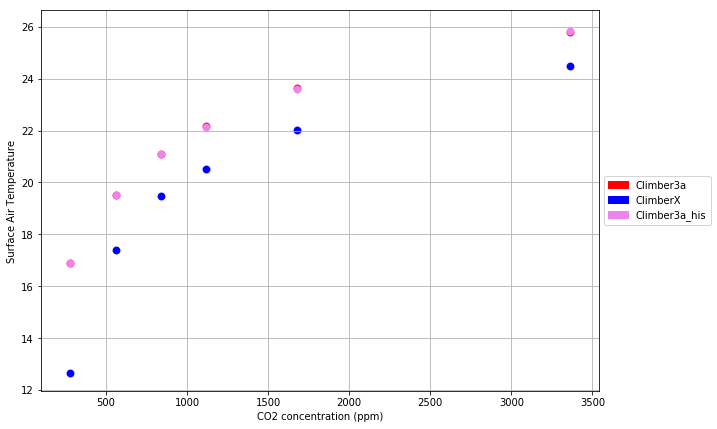

In [15]:
#Plot Planetary Albedo under different CO2 concentrations for ClimberX and Climber3a
dfClimberX_temp=Climber_weights('ClimberX')
dfClimber3a_temp=Climber_weights('Climber3a')
dfClimber3a_his_temp=Climber_weights('Climber3a_his')

dftemp = pd.concat([dfClimberX_temp, dfClimber3a_temp,dfClimber3a_his_temp])
dftemp = dftemp.reset_index(drop=True)

plot_Climber_sensitivity(dftemp,'surfacetemp','Surface Air Temperature',True)

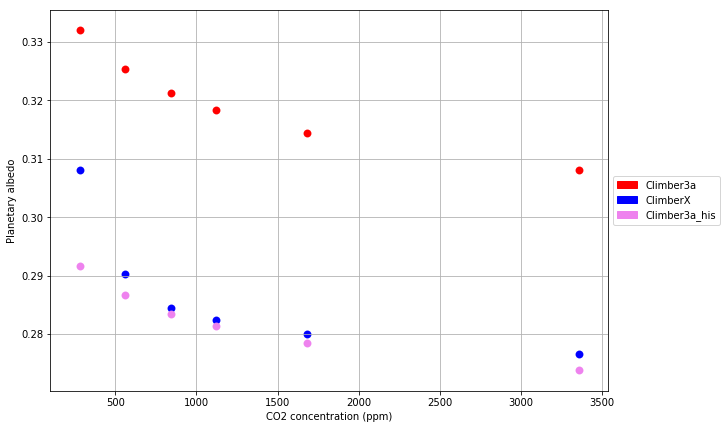

In [16]:
#Plot Planetary Albedo under different CO2 concentrations for ClimberX and Climber3a
dfClimberX_alb=Climber_weights_anyvar('ClimberX','albedo')
dfClimber3a_alb=Climber_weights_anyvar('Climber3a','albedo')
dfClimber3a_his_alb=Climber_weights_anyvar('Climber3a_his','albedo')


dfalb = pd.concat([dfClimberX_alb, dfClimber3a_alb,dfClimber3a_his_alb])
dfalb = dfalb.reset_index(drop=True)

plot_Climber_sensitivity(dfalb,'albedo','Planetary albedo',True)

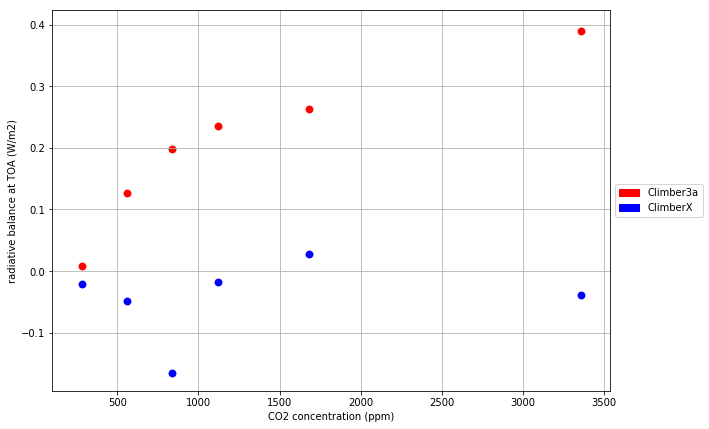

In [17]:
#Plot Radiative balance at TOA different CO2 concentrations for ClimberX and Climber3a
dfClimberX_radb=Climber_weights_anyvar('ClimberX','radbalance')
dfClimber3a_radb=Climber_weights_anyvar('Climber3a','radbalance')

dfradb = pd.concat([dfClimberX_radb, dfClimber3a_radb])
dfradb = dfradb.reset_index(drop=True)

plot_Climber_sensitivity(dfradb,'radbalance','radiative balance at TOA (W/m2)')



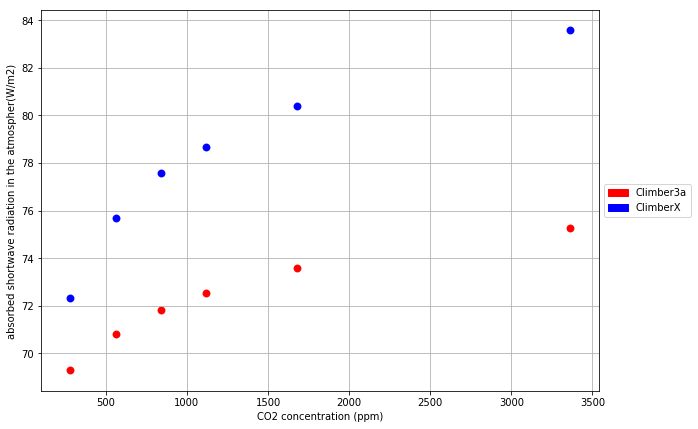

In [25]:
#Plot Absorbed Shortwave radiation for different CO2 concentrations for ClimberX and Climber3a
dfClimberX_swa=Climber_weights_anyvar('ClimberX','abs_sw')
dfClimber3a_swa=Climber_weights_anyvar('Climber3a','abs_sw')

dfswa = pd.concat([dfClimberX_swa, dfClimber3a_swa])
dfswa = dfswa.reset_index(drop=True)

plot_Climber_sensitivity(dfswa,'abs_sw','absorbed shortwave radiation in the atmospher(W/m2)')


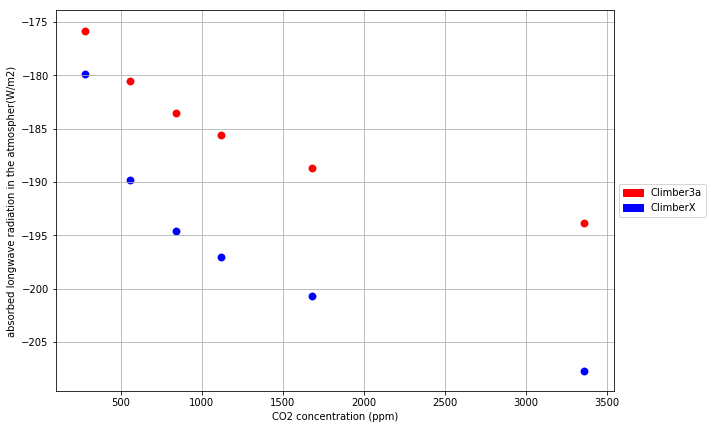

In [28]:
#Plot Absorbed Shortwave radiation for different CO2 concentrations for ClimberX and Climber3a
dfClimberX_rwa=Climber_weights_anyvar('ClimberX','abs_lw')
dfClimber3a_rwa=Climber_weights_anyvar('Climber3a','abs_lw')

dfrwa = pd.concat([dfClimberX_rwa, dfClimber3a_rwa])
dfrwa = dfrwa.reset_index(drop=True)

plot_Climber_sensitivity(dfrwa,'abs_lw','absorbed longwave radiation in the atmospher(W/m2)')


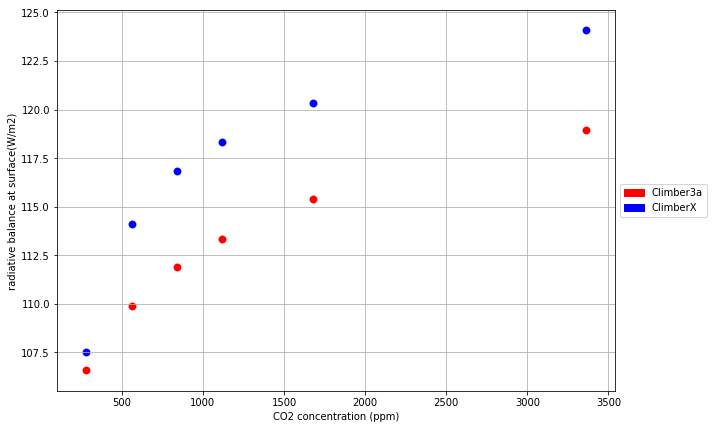

In [18]:
#Plot Radiative balance at surface different CO2 concentrations for ClimberX and Climber3a
dfClimberX_radbs=Climber_weights_anyvar('ClimberX','radbalancesur')
dfClimber3a_radbs=Climber_weights_anyvar('Climber3a','radbalancesur')

dfradbs = pd.concat([dfClimberX_radbs, dfClimber3a_radbs])
dfradbs = dfradbs.reset_index(drop=True)

plot_Climber_sensitivity(dfradbs,'radbalancesur','radiative balance at surface(W/m2)')


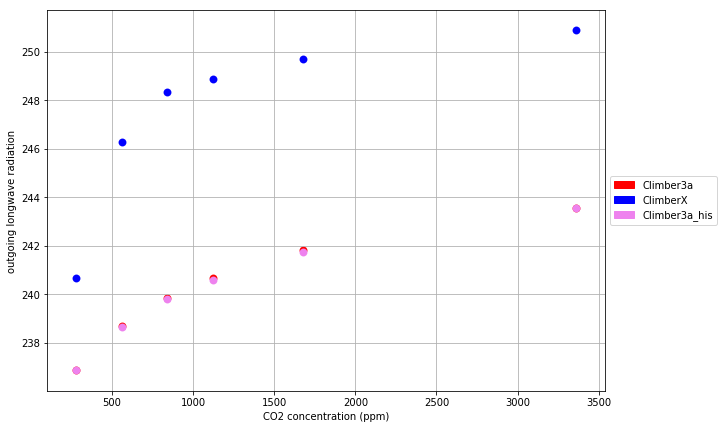

In [19]:
#Plot Outgoing LWR different CO2 concentrations for ClimberX and Climber3a
dfClimberX_outlw=Climber_weights_anyvar('ClimberX','out_lw')
dfClimber3a_outlw=Climber_weights_anyvar('Climber3a','out_lw')
dfClimber3a_his_outlw=Climber_weights_anyvar('Climber3a_his','out_lw')

dfoutlw = pd.concat([dfClimberX_outlw, dfClimber3a_outlw,dfClimber3a_his_outlw])
dfoutlw = dfoutlw.reset_index(drop=True)

plot_Climber_sensitivity(dfoutlw,'out_lw','outgoing longwave radiation',True)



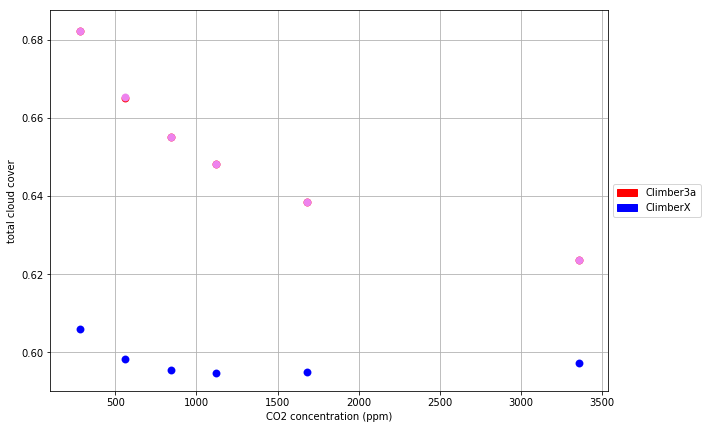

In [20]:
#Plot Cloud cover under different CO2 concentrations for ClimberX and Climber3a
dfClimberX_cld=Climber_weights_anyvar('ClimberX','clouds')
dfClimber3a_cld=Climber_weights_anyvar('Climber3a','clouds')
dfClimber3a_his_cld=Climber_weights_anyvar('Climber3a_his','clouds')

dfcld = pd.concat([dfClimberX_cld, dfClimber3a_cld,dfClimber3a_his_cld])
dfcld = dfcld.reset_index(drop=True)

plot_Climber_sensitivity(dfcld,'clouds','total cloud cover')

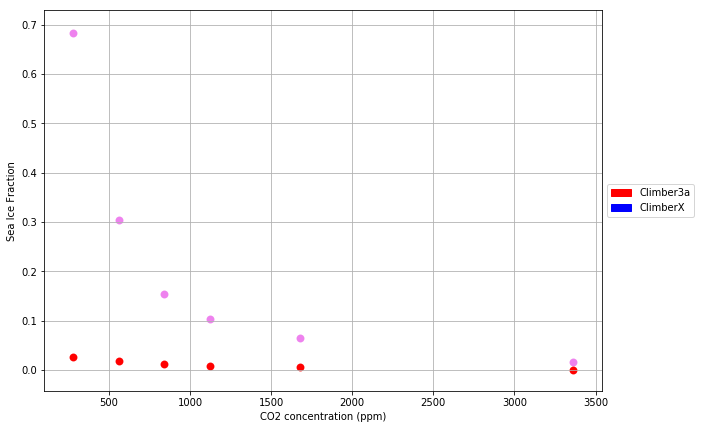

In [21]:
#plot sea ice under different CO2 concentrations for ClimberX and Climber3a
dfClimberX_sic=Climber_weights_anyvar('ClimberX_sic','seaice')
dfClimber3a_sic=Climber_weights_anyvar('Climber3a','seaice')

dfsic = pd.concat([dfClimberX_sic, dfClimber3a_sic])
dfsic = dfsic.reset_index(drop=True)

plot_Climber_sensitivity(dfsic,'seaice','Sea Ice Fraction')

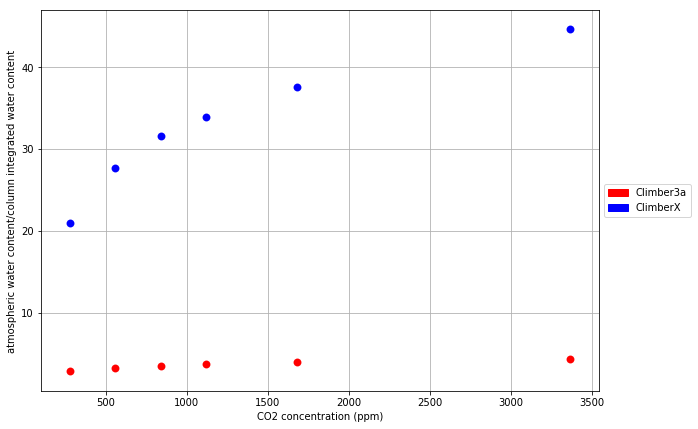

In [22]:
#Plot atmospheric water content - probably not the right variable for Climber3a???
dfClimberX_wvc=Climber_weights_anyvar('ClimberX','watervap')
dfClimber3a_wvc=Climber_weights_anyvar('Climber3a','watervap')

dfwvc = pd.concat([dfClimberX_wvc, dfClimber3a_wvc])
dfwvc = dfwvc.reset_index(drop=True)

plot_Climber_sensitivity(dfwvc,'watervap',"atmospheric water content/column integrated water content")

#Climber3a must be multiplied with a value: x~8 

In [11]:
def DeepMIP_weights(modelname,ppms,ppmts):
    """Only for DeepMIP, not Climber3a and ClimberX
    """

    surfacetemp=[]
    model=[]
    #color=[]
    
    for ppm in ppms:
        weights=np.cos(np.deg2rad(globals()[DeepMIP_dict[modelname]['model']+'x'+str(ppm)+"_tas"][DeepMIP_dict[modelname]['lat']]))

        if modelname=='CESM':
            surfacetemp.append(float((globals()[DeepMIP_dict[modelname]['model']+'x'+str(ppm)+"_tas"][DeepMIP_dict[modelname]['temp']].mean(dim=(DeepMIP_dict[modelname]['month'],DeepMIP_dict[modelname]['lon']))*weights).sum()/weights.sum())-273.15)
        else:
            surfacetemp.append(float((globals()[DeepMIP_dict[modelname]['model']+'x'+str(ppm)+"_tas"][DeepMIP_dict[modelname]['temp']].mean(dim=(DeepMIP_dict[modelname]['time'],DeepMIP_dict[modelname]['lon']))*weights).sum()/weights.sum())-273.15)
        
        model.append(modelname)
        #color.append(DeepMIP_dict[model]['color'])
    df=pd.DataFrame({'model':model,'ppm':ppmts,'surfacetemp':surfacetemp})#,'color':color})
    
    return df

In [3]:
#DeepMIP

#280ppm
CESMx1_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/CESM/CESM1.2_CAM5/piControl/v1.0/CESM1.2_CAM5-piControl-tas-v1.0.mean.nc')
COSMOSx1_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/COSMOS/COSMOS-landveg_r2413/piControl/v1.0/COSMOS-landveg_r2413-piControl-tas-v1.0.mean.nc')
GFDLx1_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/GFDL/GFDL_CM2.1/deepmip_sens_1xCO2/v1.0/GFDL_CM2.1-deepmip_sens_1xCO2-tas-v1.0.mean.nc')
INMCMx1_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/INMCM/INM-CM4-8/piControl/v1.0/INM-CM4-8-piControl-tas-v1.0.mean.nc')

#560
GFDLx2_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/GFDL/GFDL_CM2.1/deepmip_sens_2xCO2/v1.0/GFDL_CM2.1-deepmip_sens_2xCO2-tas-v1.0.mean.nc')
#HadCM3x2=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/HadCM3/HadCM3BL_M2.1aN/deepmip_sens_2xCO2/v1.0/HadCM3BL_M2.1aN-deepmip_sens_2xCO2-tas-v1.0.mean.nc')
NorESM1_Fx2_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/NorESM1_F/deepmip_sens_2xCO2/v1.0/NorESM1_F-deepmip_sens_2xCO2-tas-v1.0.mean.nc')

#840
CESMx3_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/CESM/CESM1.2_CAM5/deepmip_stand_3xCO2/v1.0/CESM1.2_CAM5-deepmip_stand_3xCO2-tas-v1.0.mean.nc')
COSMOSx3_tas= xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/COSMOS/COSMOS-landveg_r2413/deepmip_stand_3xCO2/v1.0/COSMOS-landveg_r2413-deepmip_stand_3xCO2-tas-v1.0.mean.nc')
GFDLx3_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/GFDL/GFDL_CM2.1/deepmip_stand_3xCO2/v1.0/GFDL_CM2.1-deepmip_stand_3xCO2-tas-v1.0.mean.nc')
HadCM3x3_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/HadCM3/HadCM3BL_M2.1aN/deepmip_stand_3xCO2/v1.0/HadCM3BL_M2.1aN-deepmip_stand_3xCO2-tas-v1.0.mean.nc')
IPSLx3_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/IPSL/IPSLCM5A2/deepmip_stand_3xCO2/v1.0/IPSLCM5A2-deepmip_stand_3xCO2-tas-v1.0.mean.nc')
MIROCx3_tas=xr.open_dataset ('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/MIROC/MIROC4m/deepmip_stand_3xCO2/v1.0/MIROC4m-deepmip_stand_3xCO2-tas-v1.0.mean.nc',decode_times=False)

#1120
COSMOSx4_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/COSMOS/COSMOS-landveg_r2413/deepmip_sens_4xCO2/v1.0/COSMOS-landveg_r2413-deepmip_sens_4xCO2-tas-v1.0.mean.nc')
GFDLx4_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/GFDL/GFDL_CM2.1/deepmip_sens_4xCO2/v1.0/GFDL_CM2.1-deepmip_sens_4xCO2-tas-v1.0.mean.nc')
NorESM1_Fx4_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/NorESM1_F/deepmip_sens_4xCO2/v1.0/NorESM1_F-deepmip_sens_4xCO2-tas-v1.0.mean.nc')


#1680
CESMx6_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/CESM/CESM1.2_CAM5/deepmip_stand_6xCO2/v1.0/CESM1.2_CAM5-deepmip_stand_6xCO2-tas-v1.0.mean.nc')
GFDLx6_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/GFDL/GFDL_CM2.1/deepmip_stand_6xCO2/v1.0/GFDL_CM2.1-deepmip_stand_6xCO2-tas-v1.0.mean.nc')
INMCMx6_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/INMCM/INM-CM4-8/deepmip_stand_6xCO2/v1.0/INM-CM4-8-deepmip_stand_6xCO2-tas-v1.0.mean.nc')


#2520

CESMx9_tas=xr.open_dataset('/p/projects/ace/data/DeepMIP/User_Model_Database_v1.0/CESM/CESM1.2_CAM5/deepmip_sens_9xCO2/v1.0/CESM1.2_CAM5-deepmip_sens_9xCO2-tas-v1.0.mean.nc')

/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/p/system/packages/anaconda/5.0.0_py3/envs/idp/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [ ]:
#Climber
dfClimberX=Climber_weights('ClimberX')
dfClimber3a=Climber_weights('Climber3a')

#DeepMIP
dfCESM=DeepMIP_weights('CESM',[1,3,6,9],[280,840,1680,2520])
dfCOSMOS=DeepMIP_weights('COSMOS',[1,3,4],[280,840,1120])
dfHad=DeepMIP_weights('HadCM3',[3],[840])
dfIPSL=DeepMIP_weights('IPSL',[3],[840])
dfGFDL=DeepMIP_weights('GFDL',[1,2,3,4,6],[280,560,840,1120,1680])
dfNorESM=DeepMIP_weights('NorESM1_F',[2,4],[560,1120]) #adjust NorESM1x4_tas to NorESM1_Fx4_tas
dfMIROC=DeepMIP_weights('MIROC',[3],[840])
dfINMCM=DeepMIP_weights('INMCM',[1,6],[280,1680])

In [13]:
#Climber-X last 200 years
ppms=('0280','0560','0840','1120','1680','3360')
ppmts=(280,560,840,1120,1680,3360)

var=[]
model=[]
#color=[]

for ppm in ppms:
    data=globals()['ClimberX_'+str(ppm)+'_200'].mean(dim='mon')
    
    weights=np.cos(np.deg2rad(data.lat))
    var.append(float((data.mean(dim=('time','lon'))*weights).sum()/weights.sum())-273.15)
    
    model.append('ClimberX_200')

    
dfClimberX_200=pd.DataFrame({'model':'ClimberX_200','ppm':ppmts,'surfacetemp':var})
dfClimberX_200

KeyError: 'ClimberX_0280_200'

In [37]:
df = pd.concat([dfClimberX, dfClimber3a, dfCESM, dfCOSMOS, dfHad, dfIPSL, dfGFDL, dfNorESM, dfMIROC, dfINMCM,dfClimberX_200])
df = df.reset_index(drop=True)
df

,model,ppm,surfacetemp
0,ClimberX,280,12.423025
1,ClimberX,560,16.591431
2,ClimberX,840,18.712190
3,ClimberX,1120,19.953050
4,ClimberX,1680,21.458609
5,ClimberX,3360,23.848085
6,Climber3a,280,16.895109
7,Climber3a,560,19.519474
8,Climber3a,840,21.094195
9,Climber3a,1120,22.168652


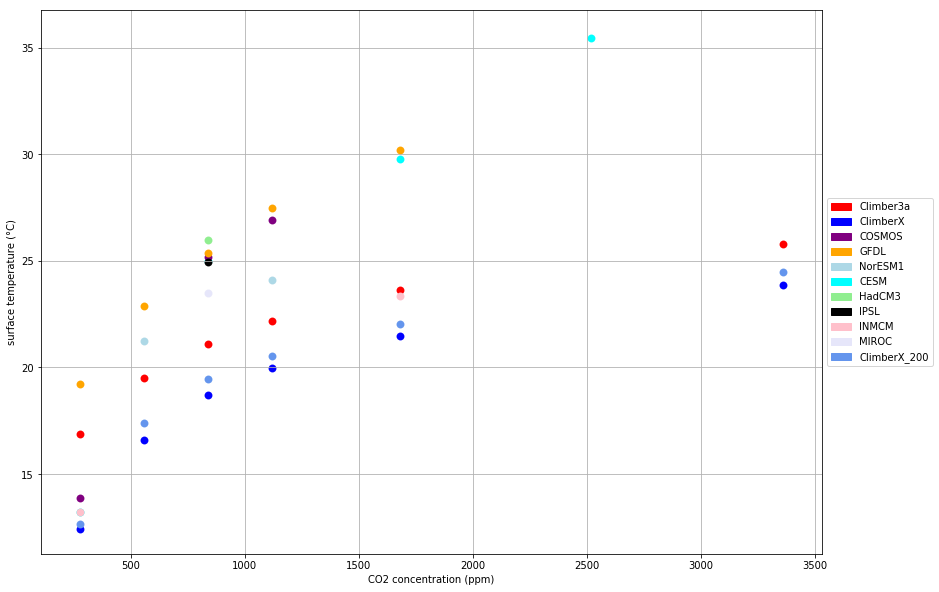

In [43]:
fig,ax=plt.subplots(figsize=(14,10))

colorlist =np.where(df['model']=='Climber3a','red',
                    (np.where(df['model']=='ClimberX','blue',
                              (np.where(df['model']=='COSMOS','purple',
                                        np.where(df['model']=='GFDL','orange',
                                                 np.where(df['model']=='NorESM1_F','lightblue',
                                                          np.where(df['model']=='CESM','cyan',
                                                                   np.where(df['model']=='HadCM3','lightgreen',
                                                                            np.where(df['model']=='IPSL','black',
                                                                                     np.where(df['model']=='MIROC','lavender',
                                                                                              np.where(df['model']=='ClimberX_200', 'cornflowerblue','pink')))))))))))) #df['color']# [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df['model']))]

red_patch = mpatches.Patch(color='red', label='Climber3a')
blue_patch = mpatches.Patch(color='blue', label='ClimberX')
purple_patch=mpatches.Patch(color='purple',label='COSMOS')
orange_patch=mpatches.Patch(color='orange',label='GFDL')
lightblue_patch=mpatches.Patch(color='lightblue',label='NorESM1')
cyan_patch=mpatches.Patch(color='cyan',label='CESM')
lightgreen_patch=mpatches.Patch(color='lightgreen',label='HadCM3')
black_patch=mpatches.Patch(color='black',label='IPSL')
pink_patch=mpatches.Patch(color='pink',label='INMCM')
lavender_patch=mpatches.Patch(color='lavender',label='MIROC')
x_patch=mpatches.Patch(color='cornflowerblue',label='ClimberX_200')




for i,c in enumerate(colorlist):

    x = df['ppm'][i]
    y = df['surfacetemp'][i]

    ax.scatter(x, y, s=60,linewidth=0.1, c=c)

ax.legend(handles=[red_patch, blue_patch,purple_patch,orange_patch,lightblue_patch,cyan_patch,lightgreen_patch,black_patch,pink_patch,lavender_patch,x_patch],loc='center left',bbox_to_anchor=(1, 0.5))

ax.set_ylabel('surface temperature (°C)')
ax.set_xlabel('CO2 concentration (ppm)')
plt.grid()
plt.show()
